GRIP @ The Sparks Foundation

Task 1 : Prediction using Supervised Machine Learning

SUBMITTED BY : GAYATHRI N

In [2]:
# Importing the required libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Reading the data from source

In [3]:
# Dataset path
URL = "http://bit.ly/w-data"
data = pd.read_csv(URL)
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


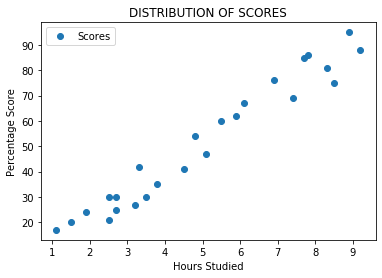

In [4]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('DISTRIBUTION OF SCORES')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
print(data.shape)

(25, 2)


In [7]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

Prepare The Data For Machine Learning Algorithm

In [9]:
#Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [10]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

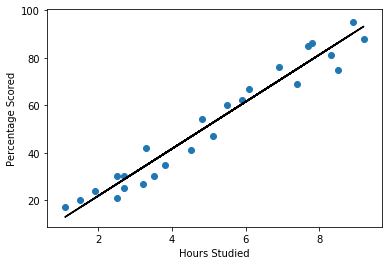

In [14]:
m = regression_model.coef_
c = regression_model.intercept_
regression_line = m * X + c
plt.plot(X, regression_line, color='black')

plt.scatter(X, y)

plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()


In [15]:
print("Training Accuracy:", regression_model.score(X_train, y_train))
print("Test Accuracy:", regression_model.score(X_test, y_test))

print(X_test)

y_predicted=regression_model.predict(X_test)
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
comp

Training Accuracy: 0.9515510725211553
Test Accuracy: 0.9454906892105356
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


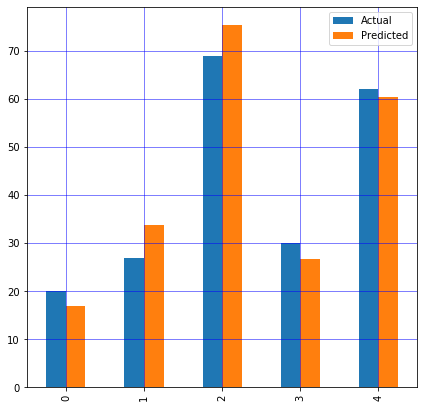

In [19]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

comp.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='blue')
plt.grid(which='minor', linewidth='0.5', color='green')
plt.show()

In [23]:
hrs = 9.25
pred_score = regression_model.predict([[hrs]])

print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


Evaluating the Model

In [26]:
from sklearn import metrics  

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_predicted)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('R-2:', metrics.r2_score(y_test, y_predicted))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
